In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
from alpha_vantage.foreignexchange import ForeignExchange 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
api_key = "968U93YONJTBSCFS"   #My Api Key

In [3]:
# Initialize the ForeignExchange class
fx = ForeignExchange(key= "api_key", output_format="pandas")

In [4]:
# Get the daily exchange rates
data, meta_data = fx.get_currency_exchange_daily(from_symbol="USD", to_symbol="KES", outputsize="full")

In [25]:
data.head()

,Open,High,Low,Close
date,,,,
2014-11-07,89.70,89.75,89.60,89.70
2014-11-10,89.70,89.75,89.60,89.75
2014-11-11,89.95,89.95,89.95,89.95
2014-11-12,89.95,90.05,89.95,90.00
2014-11-13,90.00,90.15,90.00,90.15


In [26]:
data = data.sort_index()

In [27]:
# Renaming columns
data.rename(columns={
    "1. open": "Open",
    "2. high": "High",
    "3. low": "Low",
    "4. close": "Close"
}, inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2014-11-07 to 2024-08-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2548 non-null   float64
 1   High    2548 non-null   float64
 2   Low     2548 non-null   float64
 3   Close   2548 non-null   float64
dtypes: float64(4)
memory usage: 164.1 KB


In [29]:
data.head(10)

,Open,High,Low,Close
date,,,,
2014-11-07,89.70,89.75,89.60,89.70
2014-11-10,89.70,89.75,89.60,89.75
2014-11-11,89.95,89.95,89.95,89.95
2014-11-12,89.95,90.05,89.95,90.00
2014-11-13,90.00,90.15,90.00,90.15
2014-11-14,90.15,90.15,89.90,89.90
2014-11-17,89.90,90.06,89.90,89.90
2014-11-18,89.90,90.05,89.90,90.00
2014-11-19,90.00,90.15,90.00,90.00


In [30]:
df = data["Close"]

In [31]:
df = pd.DataFrame(data=df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2548 entries, 2014-11-07 to 2024-08-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2548 non-null   float64
dtypes: float64(1)
memory usage: 104.4 KB


In [33]:
# # Set the period of the time-series data
df= df.asfreq('D')   #i have created days that are no there before.(_ d -daily)


In [34]:
# df.head(20)

In [35]:
# df.info()

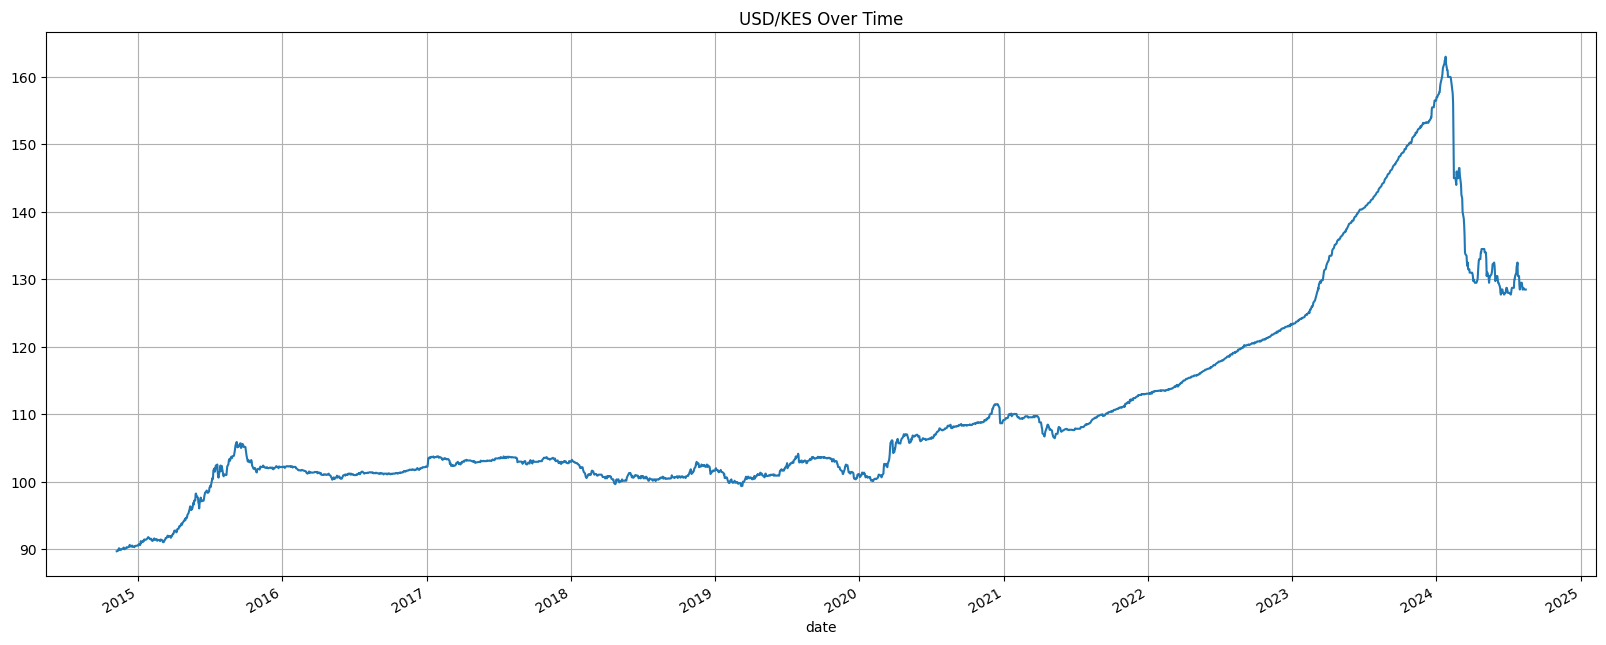

In [36]:
data["Close"].plot(figsize=(20,8))
plt.title("USD/KES Over Time")
plt.grid()
plt.show()

In [37]:
df['interpoled'] = df.interpolate(method='linear')

In [38]:
df.head()

,Close,interpoled
date,,
2014-11-07,89.70,89.700000
2014-11-08,NaN,89.716667
2014-11-09,NaN,89.733333
2014-11-10,89.75,89.750000
2014-11-11,89.95,89.950000


In [39]:
# df.loc['2020':].plot(figsize=(20,8))
# plt.title("USD/KES Over Time")
# plt.grid()
# plt.show()

In [40]:
df_set = pd.DataFrame(df["interpoled"])

In [41]:
df_set.head()

,interpoled
date,
2014-11-07,89.700000
2014-11-08,89.716667
2014-11-09,89.733333
2014-11-10,89.750000
2014-11-11,89.950000


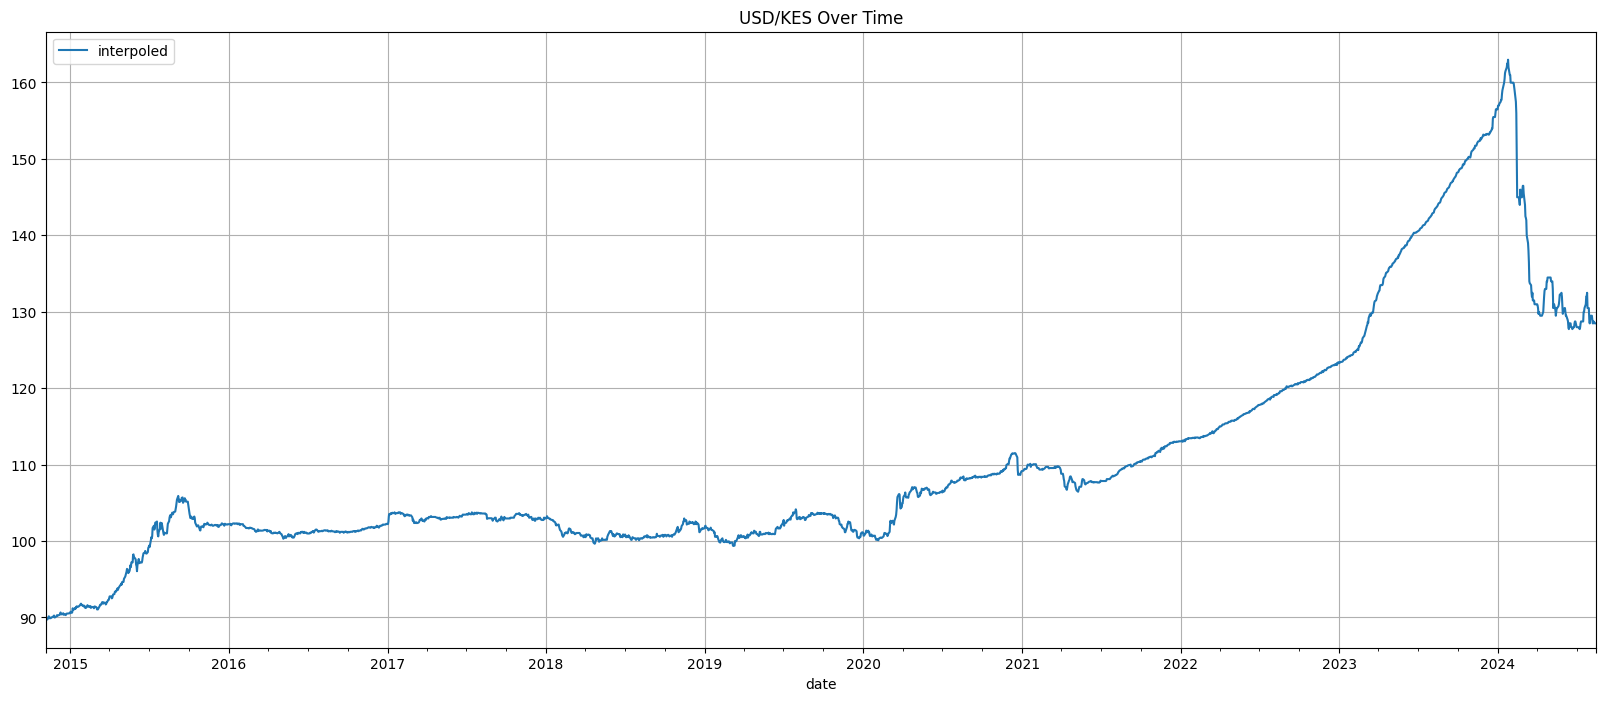

In [42]:
df_set.plot(figsize=(20,8))
plt.title("USD/KES Over Time")
plt.grid()
plt.show()

Splitting the Data

In [43]:
size = int(len(df_set)*0.8)
size

2856

In [44]:
train = df_set.iloc[:size]
test = df_set.iloc[size:]

In [45]:
train.shape

(2856, 1)

In [47]:
from pmdarima.arima import auto_arima

In [48]:
model_auto = auto_arima(train[1:])

In [49]:
model_auto

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True)

In [46]:
train.head()

,interpoled
date,
2014-11-07,89.700000
2014-11-08,89.716667
2014-11-09,89.733333
2014-11-10,89.750000
2014-11-11,89.950000


In [24]:

df_test.shape

(510, 4)

Decomposition

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
add_decomp = seasonal_decompose(df_train, model="additive")

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [27]:
add_decomp.plot()
plt.show()

NameError: name 'add_decomp' is not defined

# Stationarity Check

In [29]:
import statsmodels.tsa.stattools as sts


In [30]:
adf_results = sts.adfuller(df_train)
adf_results

ValueError: x is required to have ndim 1 but has ndim 2

In [348]:
adf_statistic = adf_results[0]
p_value = adf_results[1]
usedlag = adf_results[2]
nobs = adf_results[3]
critical_values = adf_results[4]
icbest = adf_results[5]

In [349]:
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Number of Lags Used:', usedlag)
print('Number of Observations Used:', nobs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value}')

ADF Statistic: -0.6040706678182395
p-value: 0.870059567220482
Number of Lags Used: 28
Number of Observations Used: 2895
Critical Values:
	1%: -3.4326108316927817
	5%: -2.862538883350276
	10%: -2.567301734125599


Based on the ADF test results, 
- the time series appears to be non-stationary, as the p-value is very high (p>0.05)
- the ADF statistic is not lower than any of the critical values. So we may need to apply differencing or another transformation to make the series stationary before proceeding with ARIMA modeling.

# Modeling
Differencing the Series

In [350]:
df_diff = df_train.diff().dropna()

In [351]:
#df_train

In [357]:
#df_diff

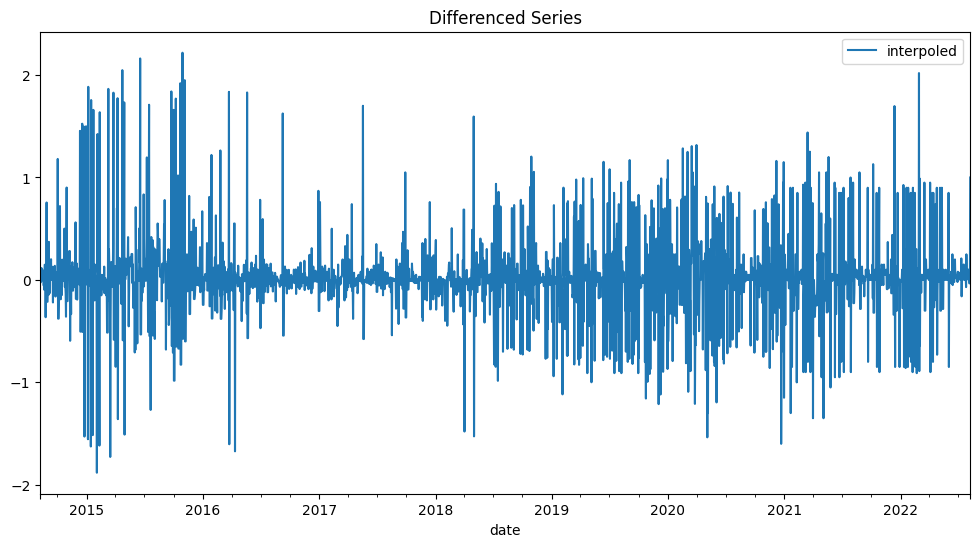

In [353]:
# Plot the differenced series
df_diff.plot(figsize=(12, 6))
plt.title('Differenced Series')
plt.show()

Determining ARIMA Parameters
- We’ll use ACF and PACF plots to determine the parameters p, 𝑑 and 𝑞

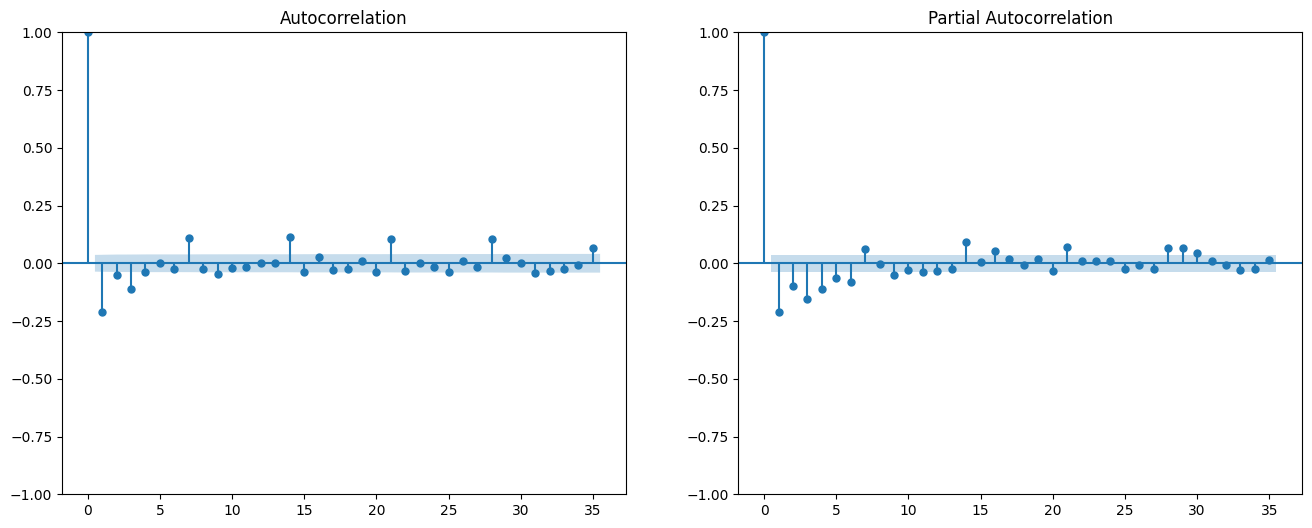

In [354]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(df_diff, ax=axes[0])
plot_pacf(df_diff, ax=axes[1])
plt.show()

SARIMAX TEST1

In [408]:
p, d, q = 1, 1, 1

In [409]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df_train["Close"], order=(p, d, q), seasonal_order=(p, d, q, 52))  
fitted = model.fit() 
print(fitted.summary())

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2087
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1368.017
Date:                            Fri, 09 Aug 2024   AIC                           2746.033
Time:                                    00:04:28   BIC                           2774.122
Sample:                                         0   HQIC                          2756.338
                                           - 2087                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0773      0.032      2.444      0.015       0.015       0.139
ma.L1         -0.5693      0.027   

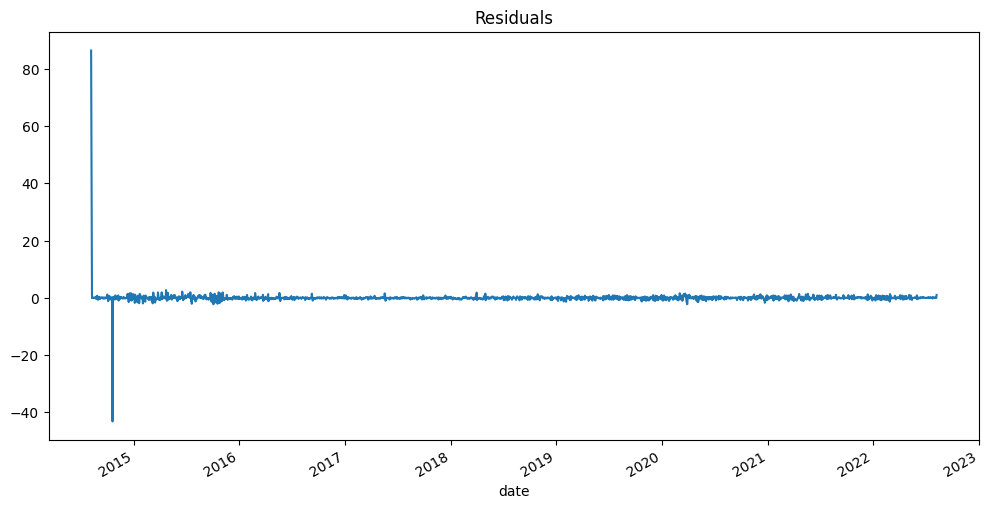

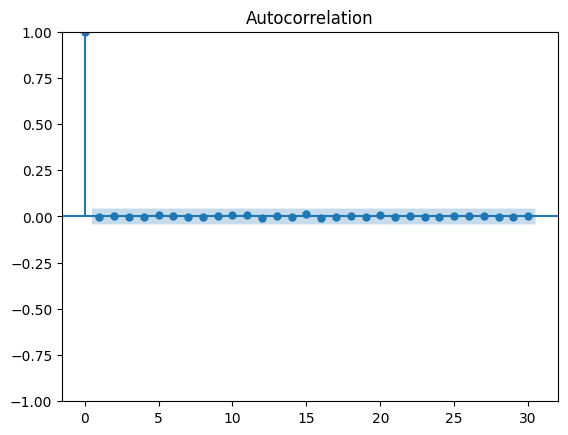

In [410]:
residuals = fitted.resid

# Plot residuals
residuals.plot(figsize=(12, 6))
plt.title('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=30)
plt.show()

In [413]:
from sklearn.metrics import mean_squared_error

# Get the predicted values
predictions = fitted.predict(start=0, end= len(df_train)-1, dynamic=False)

# Calculate Mean Squared Error
mse = mean_squared_error(df_train["Close"], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.705541624398459


In [432]:
predictions

date
2014-08-07      0.000000
2014-08-10     86.476991
2014-08-11     86.405999
2014-08-12     86.494000
2014-08-13     86.610000
                 ...    
2022-08-02    117.904680
2022-08-03    117.982371
2022-08-04    118.171529
2022-08-07    118.123942
2022-08-08    118.054829
Name: predicted_mean, Length: 2087, dtype: float64

In [415]:
df_train["Close"]

date
2014-08-07     86.477
2014-08-10     86.406
2014-08-11     86.494
2014-08-12     86.610
2014-08-13     86.603
               ...   
2022-08-02    118.050
2022-08-03    118.150
2022-08-04    118.200
2022-08-07    118.100
2022-08-08    119.100
Name: Close, Length: 2087, dtype: float64

In [419]:
# Forecast the next 522 days
forecast = fitted.forecast(steps=522)
forecast

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2087    118.674079
2088    118.859193
2089    118.783887
2090    118.754011
2091    118.803860
           ...    
2604    127.174536
2605    127.122929
2606    127.113146
2607    127.176657
2608    127.388543
Name: predicted_mean, Length: 522, dtype: float64

In [420]:
# Assuming `forecast` has 522 values
forecast_steps = len(forecast)


In [422]:

# Generate a date range with the same number of days as the forecast
forecast_dates = pd.date_range(start=df_train.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_dates

DatetimeIndex(['2022-08-09', '2022-08-10', '2022-08-11', '2022-08-12',
               '2022-08-15', '2022-08-16', '2022-08-17', '2022-08-18',
               '2022-08-19', '2022-08-22',
               ...
               '2024-07-25', '2024-07-26', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-05',
               '2024-08-06', '2024-08-07'],
              dtype='datetime64[ns]', length=522, freq='B')

In [423]:
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted_Close': forecast
})
forecast_df.set_index('Date', inplace=True)
forecast_df.head()

,Forecasted_Close
Date,
2022-08-09,118.674079
2022-08-10,118.859193
2022-08-11,118.783887
2022-08-12,118.754011
2022-08-15,118.803860


In [428]:
forecast_df.head()

,Forecasted_Close
Date,
2022-08-09,118.674079
2022-08-10,118.859193
2022-08-11,118.783887
2022-08-12,118.754011
2022-08-15,118.803860


In [427]:
df_test= pd.DataFrame(df_test["Close"])
df_test.head()

,Close
date,
2022-08-09,119.20
2022-08-10,118.35
2022-08-11,118.40
2022-08-14,118.45
2022-08-15,118.50


In [429]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2022-08-09 to 2024-08-07
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Forecasted_Close  522 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [430]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2022-08-09 to 2024-08-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   522 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


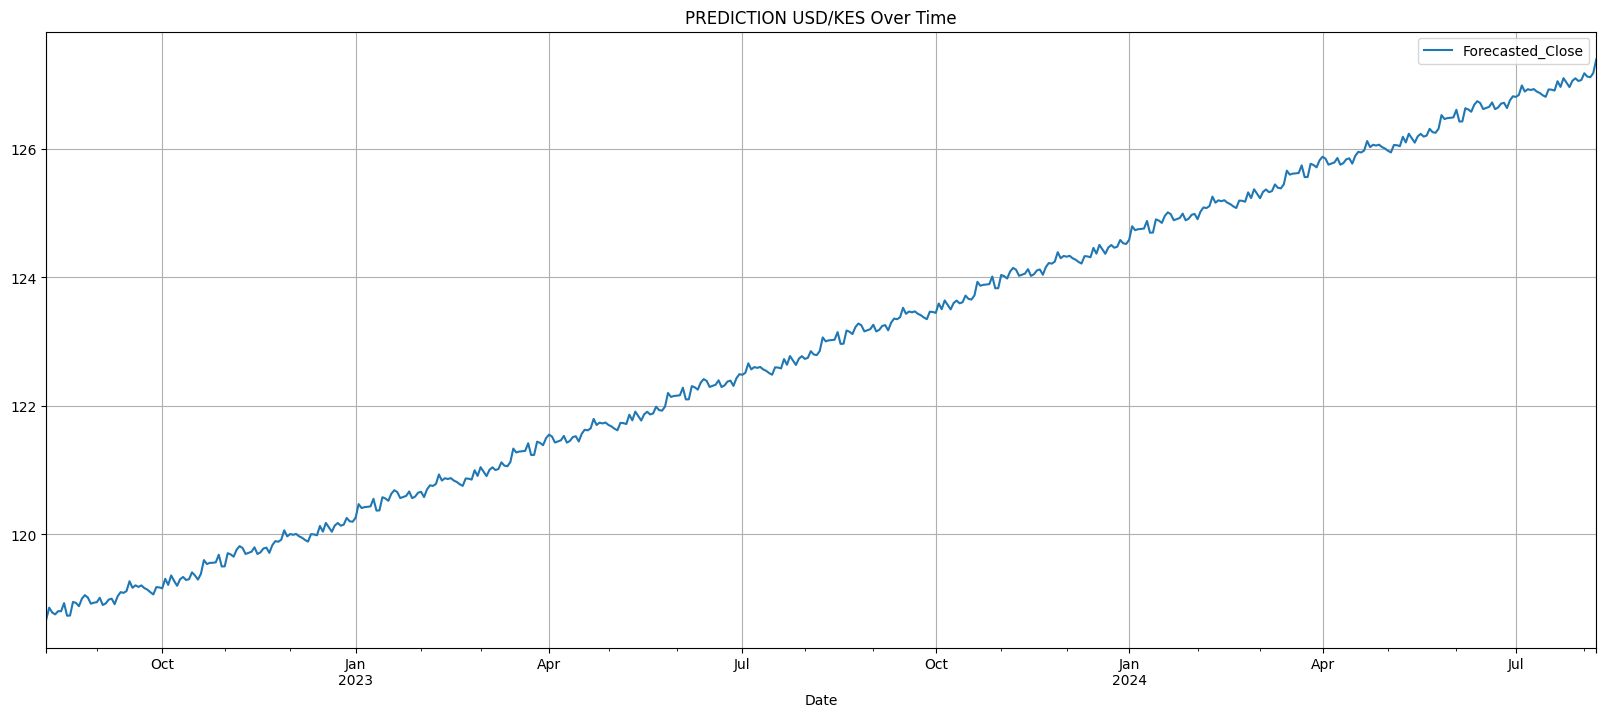

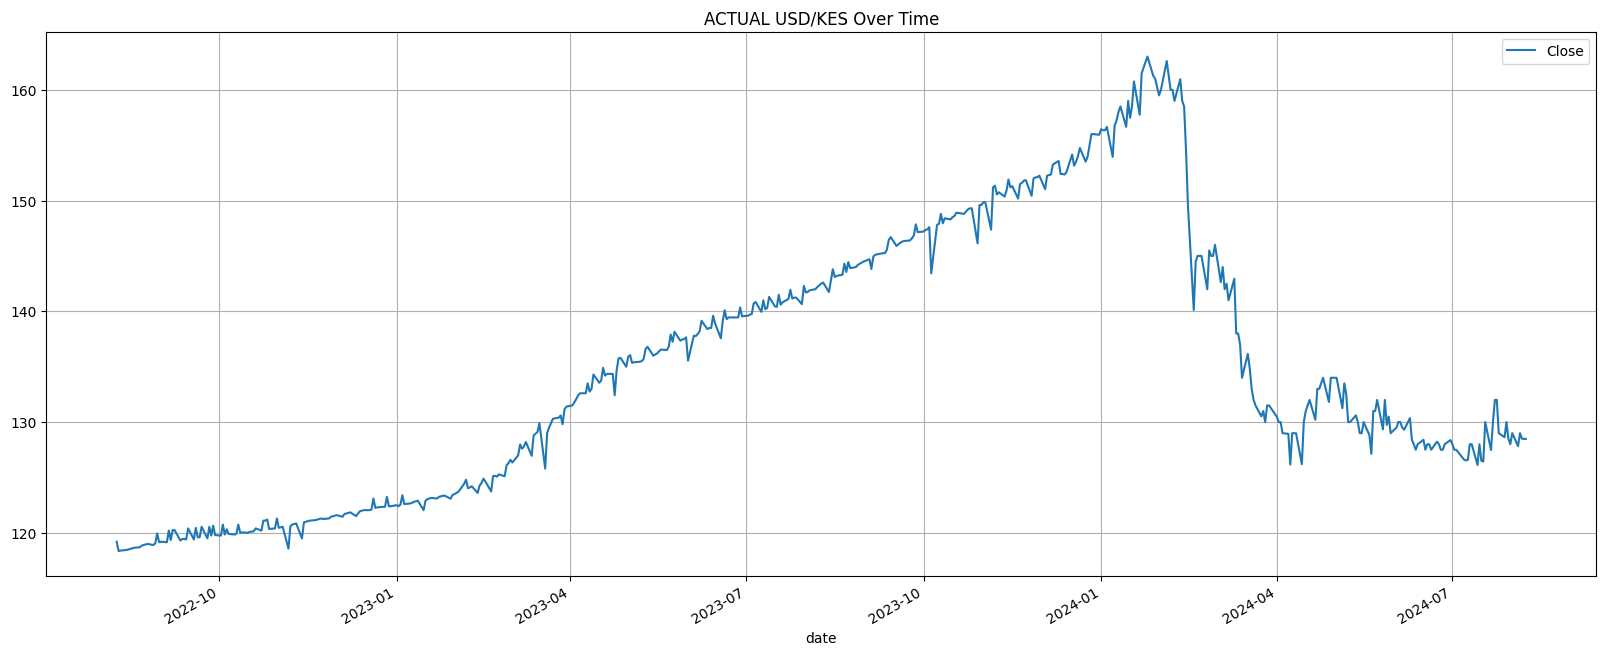

In [436]:
forecast_df.plot(figsize=(20,8))
plt.title("PREDICTION USD/KES Over Time")
plt.grid()
plt.show()

df_test.plot(figsize=(20,8))
plt.title("ACTUAL USD/KES Over Time")
plt.grid()
plt.show()

In [403]:
predictions = fitted.predict(len(data), len(data)+29)
predictions

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2609    127.327441
2610    127.342342
2611    127.346635
2612    127.353041
2613    127.470998
2614    127.288015
2615    127.290418
2616    127.495723
2617    127.476330
2618    127.440437
2619    127.549634
2620    127.604922
2621    127.575873
2622    127.482491
2623    127.500384
2624    127.516651
2625    127.585559
2626    127.481258
2627    127.506262
2628    127.566240
2629    127.580478
2630    127.498398
2631    127.618105
2632    127.681000
2633    127.671707
2634    127.702647
2635    127.849795
2636    127.755380
2637    127.791741
2638    127.779097
Name: predicted_mean, dtype: float64

In [ ]:
residuals = model_fit.resid

# Plot residuals
residuals.plot(figsize=(12, 6))
plt.title('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=30)
plt.show()

In [ ]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

forecast

In [ ]:
# Assuming `forecast` has 30 values
forecast_steps = len(forecast)

In [ ]:

# Generate a date range with the same number of days as the forecast
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_dates

Fitting the ARIMA Model

In [404]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:

# Replace p, d, q with the values identified from ACF and PACF
model = ARIMA(df_set, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
model_fit.summary()

Residual Analysis
- After fitting the model, it's important to check if the residuals (errors) are white noise.

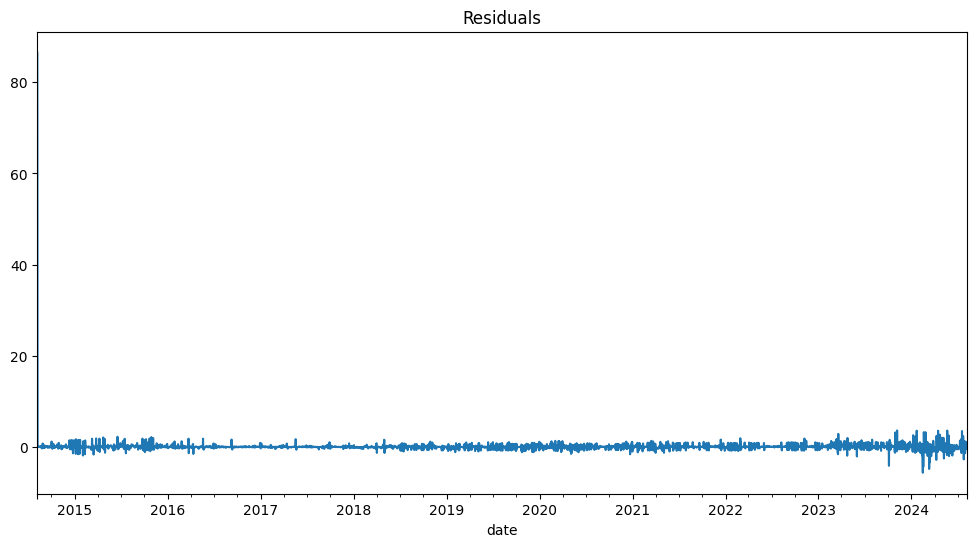

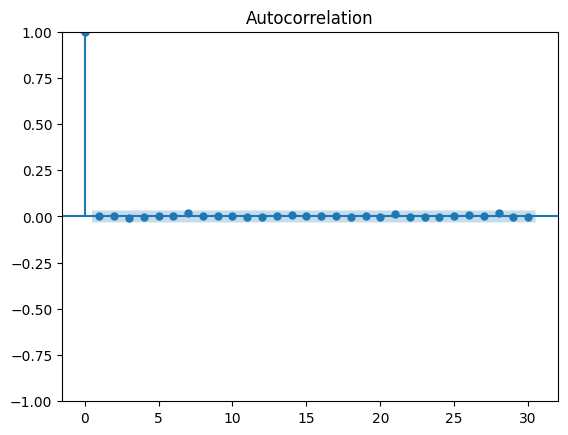

In [282]:
residuals = model_fit.resid

# Plot residuals
residuals.plot(figsize=(12, 6))
plt.title('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals, lags=30)
plt.show()

Forecast Accuracy
- We can evaluate the model’s accuracy by comparing the predicted values with the actual values.

In [283]:
from sklearn.metrics import mean_squared_error

# Get the predicted values
predictions = model_fit.predict(start=0, end=len(df_train) - 1, dynamic=False)

# Calculate Mean Squared Error
mse = mean_squared_error(df_train, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.69692618006909


In [285]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=731)

forecast

2024-08-09    128.484184
2024-08-10    128.486295
2024-08-11    128.487360
2024-08-12    128.487898
2024-08-13    128.488169
                 ...    
2026-08-05    128.488446
2026-08-06    128.488446
2026-08-07    128.488446
2026-08-08    128.488446
2026-08-09    128.488446
Freq: D, Name: predicted_mean, Length: 731, dtype: float64

SARIMA MODEL

In [286]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Replace p, d, q with the values identified from ACF and PACF
model_s = SARIMAX(df_set, order=(1, 1, 1))
model_fit_s = model_s.fit()

# Summary of the model
print(model_fit_s.summary())

                               SARIMAX Results                                
Dep. Variable:             interpoled   No. Observations:                 3655
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2809.858
Date:                Thu, 08 Aug 2024   AIC                           5625.716
Time:                        22:49:00   BIC                           5644.327
Sample:                    08-07-2014   HQIC                          5632.344
                         - 08-08-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5046      0.037     13.748      0.000       0.433       0.577
ma.L1         -0.6385      0.031    -20.378      0.000      -0.700      -0.577
sigma2         0.2725      0.002    130.559      0.0

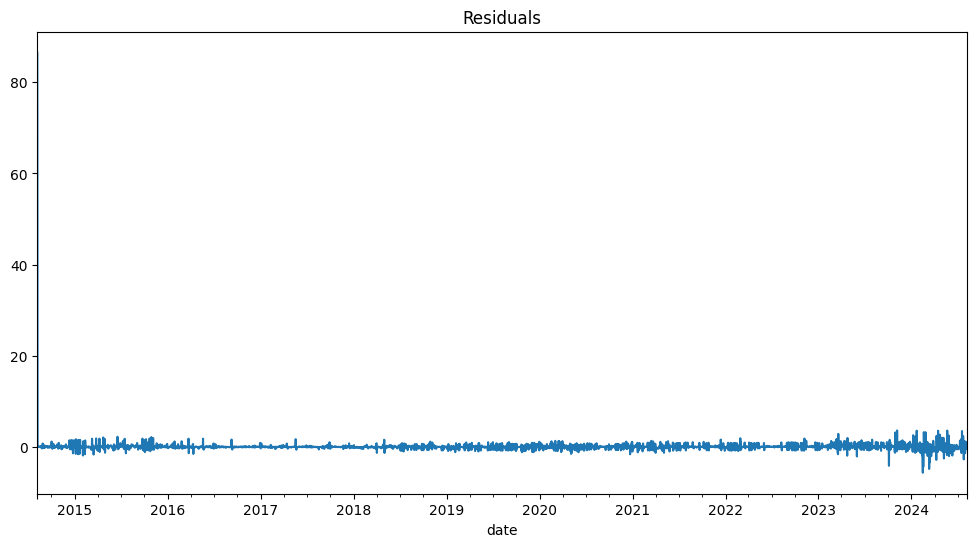

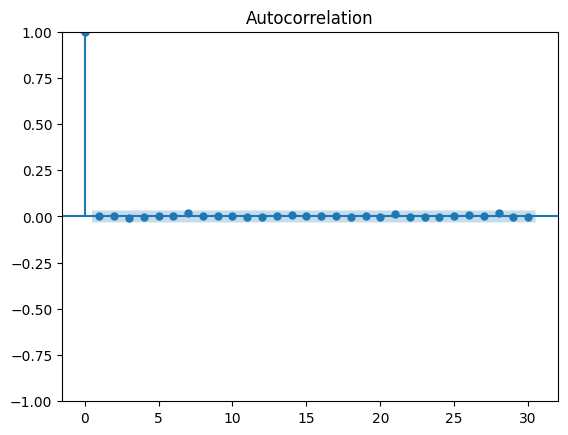

In [287]:
residuals_s = model_fit_s.resid

# Plot residuals
residuals_s.plot(figsize=(12, 6))
plt.title('Residuals')
plt.show()

# Plot ACF of residuals
plot_acf(residuals_s, lags=30)
plt.show()

In [288]:
from sklearn.metrics import mean_squared_error

# Get the predicted values
predictions_s = model_fit_s.predict(start=0, end=len(df_train) - 1, dynamic=False)

# Calculate Mean Squared Error
mse_s = mean_squared_error(df_train, predictions_s)
print(f'Mean Squared Error: {mse_s}')

Mean Squared Error: 2.69692618006909


In [289]:
predictions_s.tail()

date
2022-08-04    118.124752
2022-08-05    118.177185
2022-08-06    118.156561
2022-08-07    118.131343
2022-08-08    118.103192
Freq: D, Name: predicted_mean, dtype: float64

In [290]:
df_train.tail()

date
2022-08-04    118.200000
2022-08-05    118.166667
2022-08-06    118.133333
2022-08-07    118.100000
2022-08-08    119.100000
Freq: D, Name: interpoled, dtype: float64

In [291]:
# Forecast the next 30 days
forecast_2 = model_fit_s.forecast(steps=731)

forecast_2.head()

2024-08-09    128.484184
2024-08-10    128.486295
2024-08-11    128.487360
2024-08-12    128.487898
2024-08-13    128.488169
Freq: D, Name: predicted_mean, dtype: float64

In [292]:
df_forecast = pd.DataFrame(forecast_2)

In [293]:
df_forecast.head()

,predicted_mean
2024-08-09,128.484184
2024-08-10,128.486295
2024-08-11,128.487360
2024-08-12,128.487898
2024-08-13,128.488169


In [294]:
df_test.head()

date
2022-08-09    119.200000
2022-08-10    118.350000
2022-08-11    118.400000
2022-08-12    118.416667
2022-08-13    118.433333
Freq: D, Name: interpoled, dtype: float64

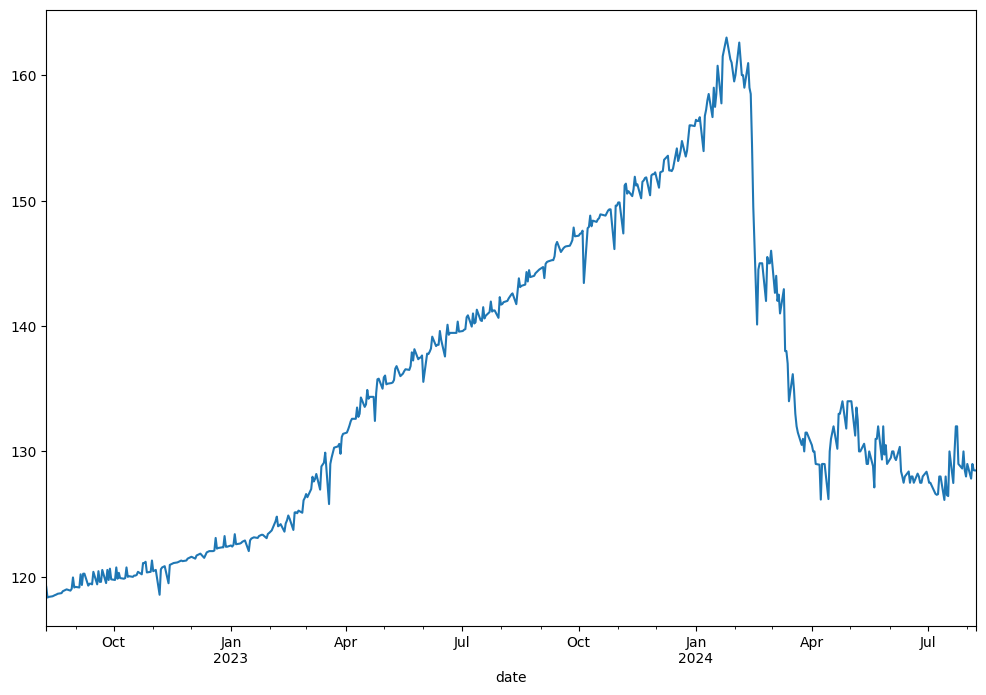

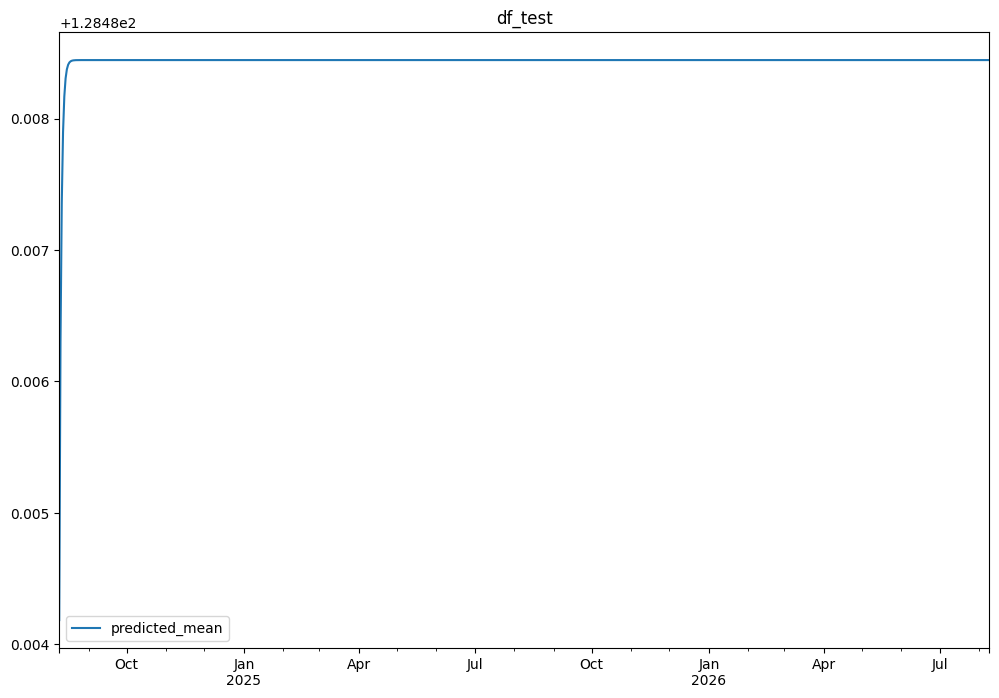

In [295]:
df_test.plot(figsize= (12,8))
df_forecast.plot(figsize= (12,8))
plt.title('df_test')
plt.show()

In [188]:
from sklearn.metrics import mean_squared_error

# Get the predicted values
predictions = model_fit.predict(start=0, end=len(df_train) - 1, dynamic=False)

# Calculate Mean Squared Error
mse = mean_squared_error(df_train, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.6930719370352794


In [189]:
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)

forecast

2022-08-09    118.826394
2022-08-10    118.697171
2022-08-11    118.636139
2022-08-12    118.607314
2022-08-13    118.593700
2022-08-14    118.587271
2022-08-15    118.584234
2022-08-16    118.582799
2022-08-17    118.582122
2022-08-18    118.581802
2022-08-19    118.581651
2022-08-20    118.581580
2022-08-21    118.581546
2022-08-22    118.581530
2022-08-23    118.581523
2022-08-24    118.581519
2022-08-25    118.581517
2022-08-26    118.581517
2022-08-27    118.581516
2022-08-28    118.581516
2022-08-29    118.581516
2022-08-30    118.581516
2022-08-31    118.581516
2022-09-01    118.581516
2022-09-02    118.581516
2022-09-03    118.581516
2022-09-04    118.581516
2022-09-05    118.581516
2022-09-06    118.581516
2022-09-07    118.581516
Freq: D, Name: predicted_mean, dtype: float64

SARIMA2

In [308]:
p, d, q = 1, 1, 1

In [314]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df["interpoled"], order=(p, d, q), seasonal_order=(p, d, q, 52))  
fitted = model.fit() 
print(fitted.summary())

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                         interpoled   No. Observations:                 3655
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -2865.669
Date:                            Thu, 08 Aug 2024   AIC                           5741.338
Time:                                    23:10:30   BIC                           5772.284
Sample:                                08-07-2014   HQIC                          5752.366
                                     - 08-08-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5050      0.041     12.279      0.000       0.424       0.586
ma.L1         -0.6354      0.035   

In [322]:
predictions = fitted.predict(start=len(df_train), end=len(df_test)-1, dynamic=False)
predictions

ValueError: Prediction must have `end` after `start`.

In [316]:
df_test

date
2022-08-09    119.200000
2022-08-10    118.350000
2022-08-11    118.400000
2022-08-12    118.416667
2022-08-13    118.433333
                 ...    
2024-08-04    127.830000
2024-08-05    129.000000
2024-08-06    128.500000
2024-08-07    128.480000
2024-08-08    128.480000
Freq: D, Name: interpoled, Length: 731, dtype: float64

In [311]:
df['forecast'] = fitted.predict(start = len(df_train), end= len(df_train)+2924, dynamic= True)


In [312]:
df.head(30)

,Close,interpoled,forecast
date,,,
2014-08-07,86.477,86.477000,NaN
2014-08-08,NaN,86.453333,NaN
2014-08-09,NaN,86.429667,NaN
2014-08-10,86.406,86.406000,NaN
2014-08-11,86.494,86.494000,NaN
2014-08-12,86.610,86.610000,NaN
2014-08-13,86.603,86.603000,NaN
2014-08-14,86.602,86.602000,NaN
2014-08-15,NaN,86.655000,NaN


In [ ]:
df[['','forecast']].plot(figsize= (12,8))
plt.title('SARIMA Prediction')
plt.show()

In [193]:
predictions = fitted.predict(len(df_test), len(df_test)+29)
predictions

date
2016-08-07    99.768605
2016-08-08    99.761834
2016-08-09    99.831048
2016-08-10    99.545166
2016-08-11    99.709968
2016-08-12    99.701955
2016-08-13    99.637711
2016-08-14    99.529040
2016-08-15    99.870829
2016-08-16    99.926767
2016-08-17    99.559878
2016-08-18    99.520796
2016-08-19    99.620042
2016-08-20    99.657153
2016-08-21    99.633798
2016-08-22    99.716702
2016-08-23    99.650942
2016-08-24    99.594292
2016-08-25    99.601901
2016-08-26    99.907637
2016-08-27    99.550557
2016-08-28    99.639434
2016-08-29    99.814248
2016-08-30    99.543439
2016-08-31    99.596975
2016-09-01    99.458437
2016-09-02    99.605686
2016-09-03    99.426715
2016-09-04    99.496104
2016-09-05    99.800842
Freq: D, Name: predicted_mean, dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(data['Close'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# If p-value > 0.05, the series is non-stationary
if adf_test[1] > 0.05:
    print("The series is non-stationary, differencing is required.")
else:
    print("The series is stationary.")

ADF Statistic: -1.4012698825385668
p-value: 0.5816671696770384
The series is non-stationary, differencing is required.


In [28]:
df['Differenced_Data'] = data['Close'].diff()

In [36]:
df = df.dropna()
df

,Close,Differenced_Data
date,,
2014-09-01,86.981,-0.05500
2014-10-01,87.670,-0.04600
2014-12-01,88.764,0.16000
2015-01-01,90.750,0.25000
2015-02-01,91.650,0.10000
...,...,...
2024-02-01,160.000,0.50000
2024-04-01,130.500,-0.25000
2024-05-01,134.000,0.00000


In [37]:
# Set the period of the time-series data
df = df.asfreq('BM')

C:\Users\Dell\AppData\Local\Temp\ipykernel_2956\585476338.py:2: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  df = df.asfreq('BM')


In [35]:
df.head()

,Close,Differenced_Data
date,,
2014-09-01,86.981,-0.055
2014-10-01,87.670,-0.046
2014-11-01,NaN,NaN
2014-12-01,88.764,0.160
2015-01-01,90.750,0.250


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# # Step 6: LSTM Model
# def prepare_data(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps), 0])
#         y.append(data[i + n_steps, 0])
#     return np.array(X), np.array(y)

# def fit_lstm(train, test, n_steps=7):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     scaled_train = scaler.fit_transform(train[['close']])
#     scaled_test = scaler.transform(test[['close']])
    
#     X_train, y_train = prepare_data(scaled_train, n_steps)
#     X_test, y_test = prepare_data(scaled_test, n_steps)
    
#     X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
#     X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
#     model = Sequential([
#         LSTM(50, activation='relu', input_shape=(n_steps, 1)),
#         Dense(1)
#     ])
#     model.compile(optimizer='adam', loss='mse')
#     model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
#     train_predict = model.predict(X_train)
#     test_predict = model.predict(X_test)
    
#     train_predict = scaler.inverse_transform(train_predict)
#     test_predict = scaler.inverse_transform(test_predict)
#     y_train = scaler.inverse_transform([y_train])
#     y_test = scaler.inverse_transform([y_test])
    
#     rmse = calculate_rmse(y_test[0], test_predict[:, 0])
    
#     plt.figure(figsize=(12, 6))
#     plt.plot(train.index[n_steps:], y_train[0], label='Train')
#     plt.plot(test.index[n_steps:], y_test[0], label='Test')
#     plt.plot(test.index[n_steps:], test_predict[:, 0], label='Forecast')
#     plt.title('LSTM Forecast')
#     plt.legend()
#     plt.show()
    
#     print(f'LSTM RMSE: {rmse}')